<a href="https://colab.research.google.com/github/georgiastuart/python_data_science_for_teachers/blob/main/Python_For_Data_Science_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeTeach Python Day 4 Lesson 1: Introduction to Regression Neural Networks

This lesson is inspired by [this notebook](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-housing-price-prediction) on Kaggle. 

We will use the [Tensorflow](https://www.tensorflow.org/api_docs/python/tf) Python library in order to build a neural network to predict housing prices (in 1970s Boston). 

## What is a Neural Network?

A *neural network* is a mathematical structure composed of layers of neurons inspired by how our brains work. 

[This 3Blue1Brown video](https://www.youtube.com/watch?v=aircAruvnKk) is a great introduction to the structure of neural networks.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Acquiring Data

For this tutorial, we'll use data that's provided by the `keras` module itself. We'll load a *training set* and its associated *labels* (output) and a *test set* with labels. 

The data is [Boston Housing Price Data](https://keras.io/api/datasets/boston_housing/) which is composed of 13 factors that may predict the price of a house in Boston. The keras dataset is simply a numpy array, but we can see what each column refers to [here](http://lib.stat.cmu.edu/datasets/boston).

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Lets look at the data:

In [3]:
print(train_features.shape)
print(train_labels.shape)

(404, 13)
(404,)


As you can see, we have 404 data observations and 13 pieces of information 

Now we need to set up the data for training the network. If we look at the data, we see that each line of data is all different magnitudes:

In [4]:
print(train_features[0, :])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Neural networks are more effectively trained when data is *normalized*, so we're going to scale each column so that they're on the same scale.

We do that by calculating the *z-score* of each datapoint (the number of standard deviations away from the mean):

$$\frac{x - \bar{x}}{\sigma}$$

where $x$ is a data point, $\bar{x}$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.

In [5]:
train_mean = np.mean(train_features, axis=0)
print(train_mean.shape, train_mean)
train_std = np.std(train_features, axis=0)

normalized_train_features = (train_features - train_mean) / train_std

(13,) [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


In [6]:
label_mean = np.mean(train_labels)
label_std = np.std(train_labels)
normalized_train_labels = (train_labels - label_mean) / label_std

Now, if we look at the mean of the normalized train features, it will be zero for all features (within floating point error) and the standard deviation will be 1 for all features:

In [7]:
print(np.mean(normalized_train_features, axis=0))
print(np.std(normalized_train_features, axis=0))

[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now that our data is normalized, we need to build the structure of our neural network:

In [8]:
def build_model():
  model = keras.Sequential([
                            Dense(20, activation=tf.nn.relu, input_shape=[normalized_train_features.shape[1]]),
                            Dense(1)
  ])

  model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae', 'mse'])
  return model

Now we need to train our neural network. 

Here's the next video in the [3Blue1Brown Neural Network series](https://www.youtube.com/watch?v=IHZwWFHWa-w).

In [9]:
model = build_model()
history = model.fit(normalized_train_features, normalized_train_labels, epochs=1000, validation_split=0.1, verbose=0)

In [10]:
hist = pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.130784,0.740838,1.130784,0.495126,0.585270,0.495126
1,0.906808,0.664618,0.906808,0.384290,0.503552,0.384290
2,0.738172,0.600307,0.738172,0.314763,0.444144,0.314763
3,0.635058,0.554121,0.635058,0.277894,0.408861,0.277894
4,0.532776,0.515203,0.532776,0.258116,0.392934,0.258116
...,...,...,...,...,...,...
995,0.032749,0.133766,0.032749,0.117985,0.270568,0.117985
996,0.030557,0.127834,0.030557,0.113915,0.268503,0.113915
997,0.030616,0.128102,0.030616,0.114987,0.268429,0.114987
998,0.031334,0.130860,0.031334,0.116904,0.270952,0.116904


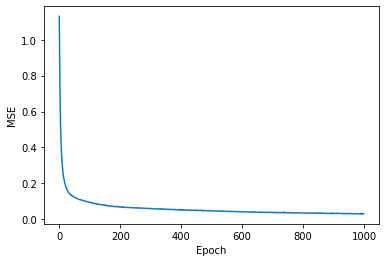

In [11]:
plt.plot(hist['mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE');

Now lets look at a few pieces of test data and see what our network preducts!

In [12]:
normalized_test_features = (test_features - train_mean) / train_std
normalized_test_features.shape

(102, 13)

(102, 1)


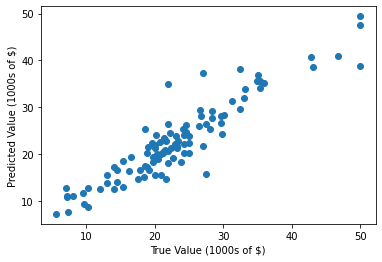

In [14]:
result = model.predict(normalized_test_features)
print(result.shape)

plt.scatter(test_labels, result[:, 0] * label_std + label_mean)
plt.xlabel('True Value (1000s of $)')
plt.ylabel('Predicted Value (1000s of $)');
